# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset:

Import the necessary libraries and create your dataframe(s).

In [5]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

# read the data
df = pd.read_csv('cleanmath.csv')
df

,Unnamed: 0,STU_ID,X2SEX,X2RACE,X2SESQ5,X2TXMQUINT,X2MTHID,X2MTHUTI,X2MTHEFF,X2MTHINT_R
0,0,10001,1,8,5,5,0.16,1.21,1.73,-0.21
1,1,10002,2,8,2,4,-0.42,-0.50,-0.70,-0.60
2,2,10003,2,3,5,4,-1.54,-0.90,-0.56,-1.39
3,3,10007,2,8,4,2,0.12,0.38,-1.09,-0.47
4,4,10009,1,8,4,5,0.70,-0.50,0.32,-1.25
...,...,...,...,...,...,...,...,...,...,...
16213,16213,35200,1,8,5,5,1.82,0.80,1.73,2.17
16214,16214,35203,2,5,1,3,-0.42,1.21,0.11,-0.60
16215,16215,35204,2,8,3,3,-0.42,1.21,1.73,0.31
16216,16216,35205,1,8,5,3,-1.54,-3.94,-1.30,-1.89


## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

<AxesSubplot:xlabel='index'>

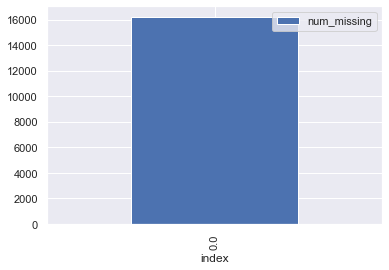

In [14]:
# first create missing indicator for features with missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')





## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

In [13]:
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
STU_ID - 0%
X2SEX - 0%
X2RACE - 0%
X2SESQ5 - 0%
X2TXMQUINT - 0%
X2MTHID - 0%
X2MTHUTI - 0%
X2MTHEFF - 0%
X2MTHINT_R - 0%


## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [24]:
#I took almost all of the columns of the original dataset.
#There was a lot of unnecesary data that I removed for this project (before I got to my "clean" dataset used here.)

## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

<AxesSubplot:>

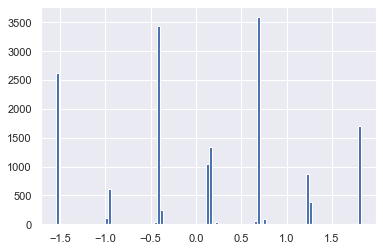

In [16]:
# histogram Variable 1 Math Identity
df['X2MTHID'].hist(bins=100)


<AxesSubplot:>

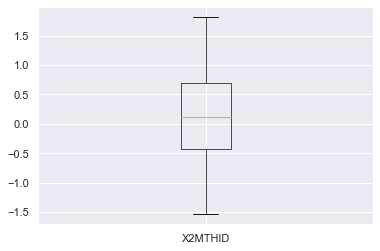

In [17]:
# box plot Varibale 1 Math Identity
df.boxplot(column=['X2MTHID'])

#There are clearly some major outliers. It's getting interesting.

<AxesSubplot:>

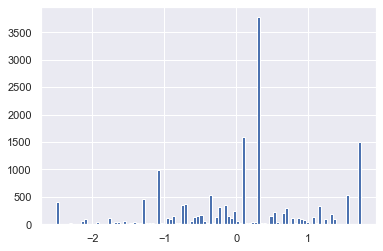

In [18]:
# histogram Variable 2 Math Efficacy
df['X2MTHEFF'].hist(bins=100)

#noticing a clear skew

<AxesSubplot:>

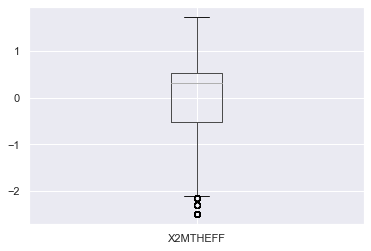

In [19]:
# box plot Variable 2 Math Efficacy
df.boxplot(column=['X2MTHEFF'])

#The outliers are clear here as well.

<AxesSubplot:>

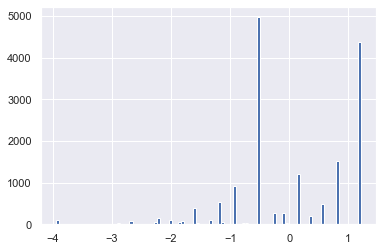

In [20]:
# histogram Variable 3 Math Utility
df['X2MTHUTI'].hist(bins=100)

#noticing bimodal shape

<AxesSubplot:>

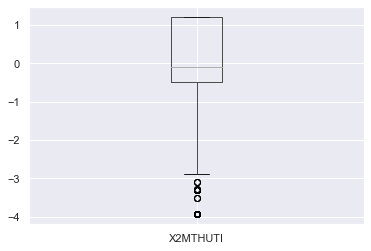

In [21]:
# box plot Variable 3 Math Utility
df.boxplot(column=['X2MTHUTI'])

#clear outliers on the negative side

<AxesSubplot:>

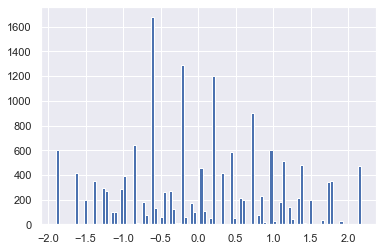

In [22]:
# histogram Variable 4 Math Interest
df['X2MTHINT_R'].hist(bins=100)

#The two ends aren't as low as a normal distrubition might have. That interests me.

<AxesSubplot:>

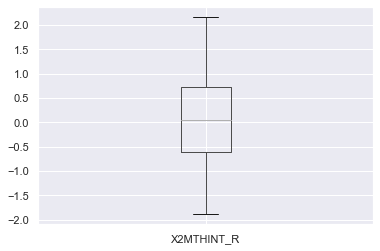

In [23]:
# box plot Variable 4 Math Interest
df.boxplot(column=['X2MTHINT_R'])

## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?
2. Did the process of cleaning your data give you new insights into your dataset?
3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?

In [27]:
#1. I dealt with missing and unnecessary data before this notebook.
#2. The histograms and boxplots of my four "x" variables definitely shined light on their distribution and outliers.
#3. I somehow feel the need to validate these exploratory findings (in case they are due to error on my part). I don't know how.